In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from calendar import month_name

import warnings 

warnings.filterwarnings("ignore")

In [4]:
messages_df = pd.read_csv('../messages.csv')

members_df = pd.read_csv('../group_members.csv')

In [5]:
messages_df['Date'] = pd.to_datetime(messages_df['Date'])
# messages_df['From'] = messages_df['From'].fillna(0).astype(int)
members_df.set_index('User ID', inplace=True)

In [6]:
merged_df = pd.merge(messages_df, members_df, left_on='From', right_on='User ID')
len(merged_df)

144892

In [7]:
message_count = messages_df.groupby('From').size().rename('Count')
print(len(message_count))
print(len(messages_df))
print(len(members_df))

2959
267182
1544


In [8]:
member_message_count = pd.merge(members_df, message_count, left_on='User ID', right_index=True, how='left')
member_message_count['Count'] = member_message_count['Count'].fillna(0).astype(int)

nonactive = member_message_count[member_message_count['Count'] == 0]
nonactive.head()

Username     First Name            Last Name  Count
User ID                                                              
1623142545     TheAsadullo       Asadullo                  NaN      0
762775705          MissRaR           Miss  ®@® student affairs      0
539941987     TomskovaAnna  Anna Tomskova                  NaN      0
701590804   sherzod_asanov       Sherzod™                  NaN      0
227667691    Abdulxakimbek     Abdulhakim                  NaN      0

In [9]:
bins = [-1, 0, 10, 50, 100, float('inf')]
labels = ['0', '1-10', '11-50', '51-100', '100+']
member_message_count['Count_Category'] = pd.cut(member_message_count['Count'], bins=bins, labels=labels,  include_lowest=True)
category_counts = member_message_count['Count_Category'].value_counts()


In [10]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2', '#ff9900']

In [11]:
category_counts

Count_Category
1-10      487
0         380
11-50     344
100+      222
51-100    111
Name: count, dtype: int64

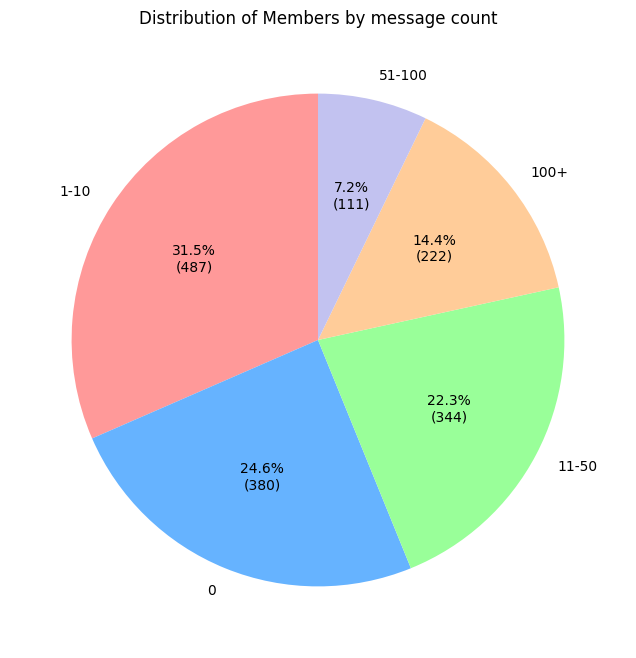

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(category_counts) / 100), startangle=90, colors = colors)
plt.title('Distribution of Members by message count')
plt.show()